### Data Visualization Lab 2 ###
Eda Haberman dataset 

Utkarsh Bhangale 
20200802124

### Exploratory Data Analysis (EDA) ###

load the data and perform some initial analysis. Assuming you have the dataset in a CSV file:

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('haberman.csv') 

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Data types and counts
print(data.info())


   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
age       0
year      0
nodes     0
status    0
dtype: int64
              age        year       nodes      status
count  305.000000  305.000000  305.000000  305.000000
mean    52.357377   62.868852    4.032787    1.262295
std     10.678010    3.242783    7.200528    0.440605
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.000000   66.000000    4.000000    2.000000
max     78.000000   69.000000   52.000000    2.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     305 non-null    int64
 1   year    305 non-null    int64
 2   nodes   305 non-null    int64
 3   s

### EDA###

C:\Users\utkar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


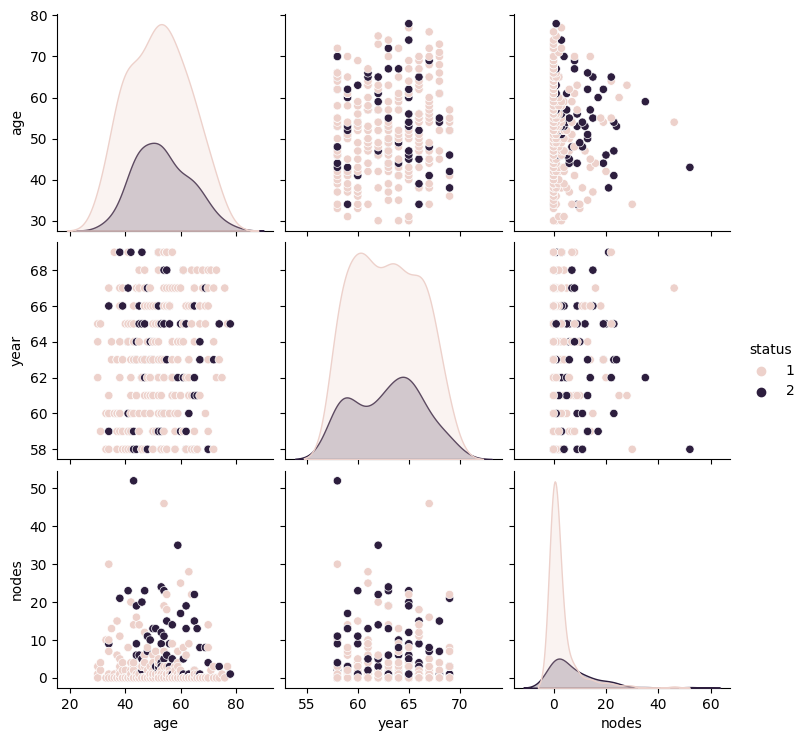

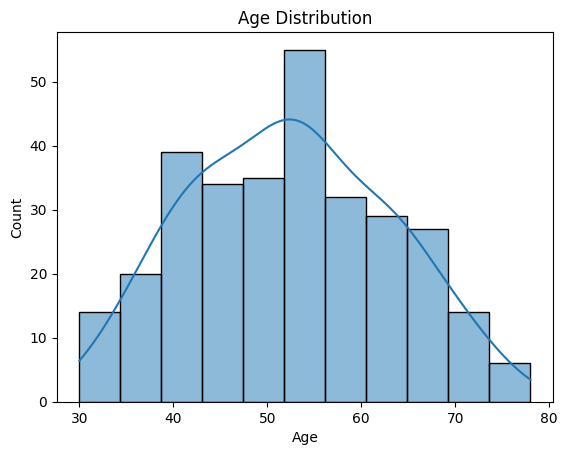

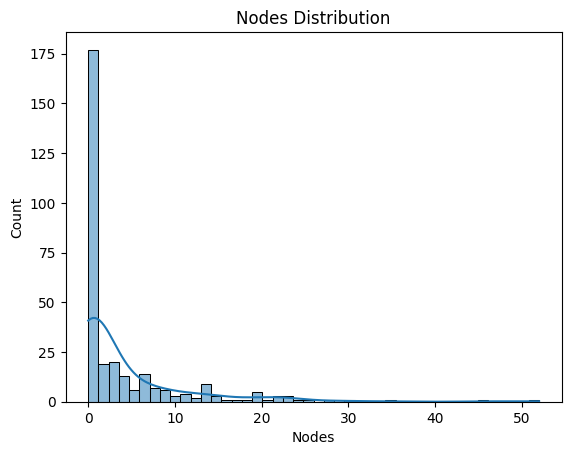

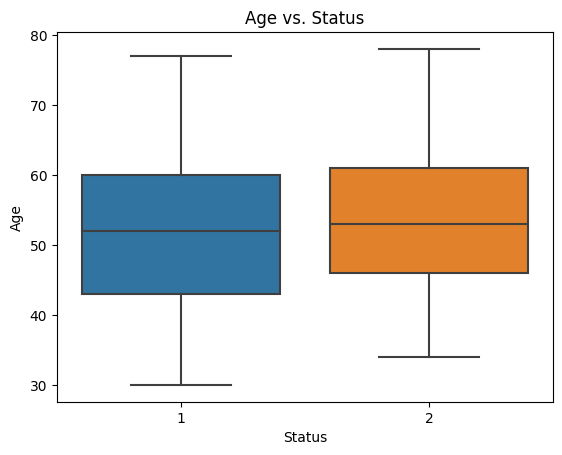

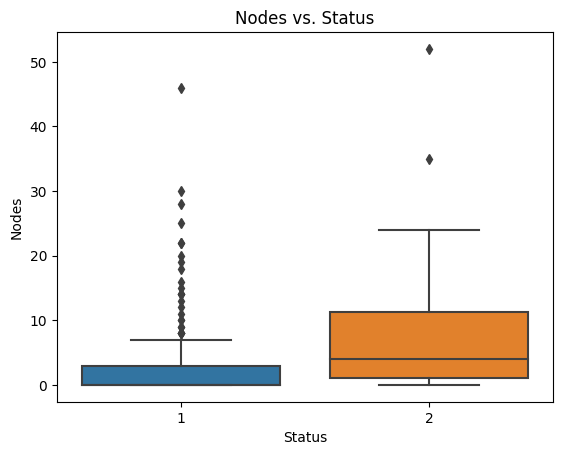

In [3]:
# Pairplot to visualize relationships between numerical attributes
sns.pairplot(data, hue='status')
plt.show()

# Histograms to visualize the distribution of individual features
sns.histplot(data['age'], kde=True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

sns.histplot(data['nodes'], kde=True)
plt.xlabel('Nodes')
plt.title('Nodes Distribution')
plt.show()

# Box plots to identify outliers
sns.boxplot(x='status', y='age', data=data)
plt.xlabel('Status')
plt.ylabel('Age')
plt.title('Age vs. Status')
plt.show()

sns.boxplot(x='status', y='nodes', data=data)
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.title('Nodes vs. Status')
plt.show()



### Basic Statistical Analysis 

In [4]:
# Calculate mean, median, and standard deviation for age and nodes
mean_age = data['age'].mean()
median_age = data['age'].median()
std_age = data['age'].std()

mean_nodes = data['nodes'].mean()
median_nodes = data['nodes'].median()
std_nodes = data['nodes'].std()

print(f"Age: Mean={mean_age}, Median={median_age}, Standard Deviation={std_age}")
print(f"Nodes: Mean={mean_nodes}, Median={median_nodes}, Standard Deviation={std_nodes}")


Age: Mean=52.35737704918033, Median=52.0, Standard Deviation=10.678009544589289
Nodes: Mean=4.032786885245901, Median=1.0, Standard Deviation=7.200528153862346


### Multivariate Analysis

Correlation Analysis

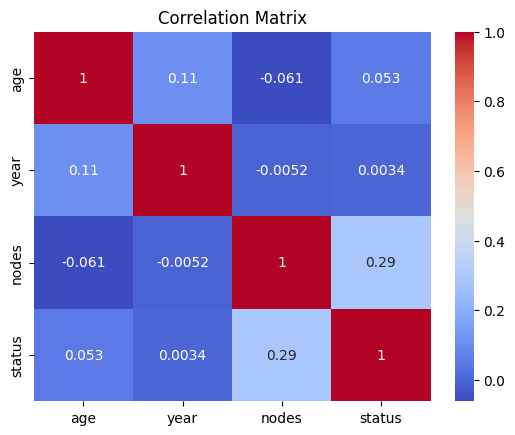

In [5]:
# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Logistic Regression (Predictive Analysis):

Accuracy: 0.6721311475409836
              precision    recall  f1-score   support

           1       0.68      0.95      0.80        41
           2       0.50      0.10      0.17        20

    accuracy                           0.67        61
   macro avg       0.59      0.53      0.48        61
weighted avg       0.62      0.67      0.59        61



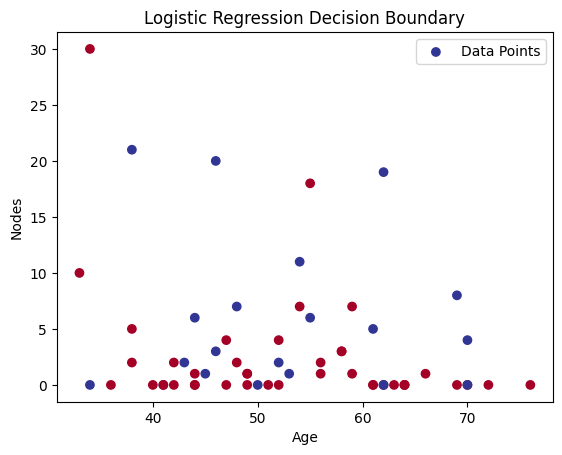

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define your features (X) and target variable (y)
X = data[['age', 'year', 'nodes']]
y = data['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Assuming you have already trained a logistic regression model
# Model parameters (intercept and coefficients)
intercept = model.intercept_
coefficients = model.coef_[0]

# Create a scatter plot of the data points
plt.scatter(X_test['age'], X_test['nodes'], c=y_test, cmap='RdYlBu', marker='o', label='Data Points')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Nodes')
plt.title('Logistic Regression Decision Boundary')
plt.legend(loc='best')

# Show the plot
plt.show()
